In [179]:

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [180]:
df=pd.read_csv('persona_hogares_nuevo_activo.csv', sep=',')
df.head()

/opt/anaconda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (137,170,171,175,176,178,179) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,yhog,yhogpc,z,zext,pcero,puno,pdos,pextcero,pextuno,pextdos
0,514-00377165338-A-0151,Potosí,Urbana,7,2.Mujer,17,10,11,2002,3.HIJO/A O ENTENADO/A,...,8405.5263671875,1050.69079589844,939.419983,460.089996,No pobre,0,0,No pobre extremo,0,0
1,814-07304888064-A-0091,Beni,Urbana,2,2.Mujer,55,25,4,1964,2.ESPOSA/O O CONVIVIENTE,...,6231,2077,862.669983,420.010010,No pobre,0,0,No pobre extremo,0,0
2,722-05544092985-A-0211,Santa Cruz,Urbana,2,2.Mujer,38,4,9,1981,2.ESPOSA/O O CONVIVIENTE,...,8125,1354.16662597656,789.750000,404.579987,No pobre,0,0,No pobre extremo,0,0
3,111-00416110273-A-0051,Chuquisaca,Urbana,2,2.Mujer,31,30,8,1988,2.ESPOSA/O O CONVIVIENTE,...,3511.39990234375,702.279968261719,1020.330017,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0
4,723-05165997060-A-0271,Santa Cruz,Urbana,4,2.Mujer,7,4,4,2012,3.HIJO/A O ENTENADO/A,...,6897,1724.25,789.750000,404.579987,No pobre,0,0,No pobre extremo,0,0


In [181]:
# renombramos la columna condicion laboral
df = df.rename(columns={'condact': 'target'})

In [182]:
label_encoder = preprocessing.LabelEncoder()
#df['target'] = label_encoder.fit_transform(df['target'])
#df['edad_e'] = label_encoder.fit_transform(df['edad'])
#df['genero_e'] = label_encoder.fit_transform(df['genero'])
#df['tipohogar_e'] = label_encoder.fit_transform(df['tipohogar'])
#df['razontrabaja_e'] = label_encoder.fit_transform(df['razontrabaja'])
#df['cobersalud_e'] = label_encoder.fit_transform(df['cobersalud'])
#df['hijos_e'] = label_encoder.fit_transform(df['hijos'])
#df['ocupacion_e'] = label_encoder.fit_transform(df['ocupacion'])
#df['relacionjefehogar_e'] = label_encoder.fit_transform(df['relacionjefehogar'])
#df['interhouse'] = label_encoder.fit_transform(df['internet_casa'])

df.head()

,folio,depto,area,nro,genero,edad,dianac,mesnac,anionac,relacionjefehogar,...,yhog,yhogpc,z,zext,pcero,puno,pdos,pextcero,pextuno,pextdos
0,514-00377165338-A-0151,Potosí,Urbana,7,2.Mujer,17,10,11,2002,3.HIJO/A O ENTENADO/A,...,8405.5263671875,1050.69079589844,939.419983,460.089996,No pobre,0,0,No pobre extremo,0,0
1,814-07304888064-A-0091,Beni,Urbana,2,2.Mujer,55,25,4,1964,2.ESPOSA/O O CONVIVIENTE,...,6231,2077,862.669983,420.010010,No pobre,0,0,No pobre extremo,0,0
2,722-05544092985-A-0211,Santa Cruz,Urbana,2,2.Mujer,38,4,9,1981,2.ESPOSA/O O CONVIVIENTE,...,8125,1354.16662597656,789.750000,404.579987,No pobre,0,0,No pobre extremo,0,0
3,111-00416110273-A-0051,Chuquisaca,Urbana,2,2.Mujer,31,30,8,1988,2.ESPOSA/O O CONVIVIENTE,...,3511.39990234375,702.279968261719,1020.330017,494.549988,Pobre,0.311712920665741,0.097164943814278,No pobre extremo,0,0
4,723-05165997060-A-0271,Santa Cruz,Urbana,4,2.Mujer,7,4,4,2012,3.HIJO/A O ENTENADO/A,...,6897,1724.25,789.750000,404.579987,No pobre,0,0,No pobre extremo,0,0


In [184]:
df[['edad','hijos', 'aestudio','target']]

,edad,hijos,aestudio,target
0,17,1,7,p_aspirante
1,55,0,17,p_temporal
2,38,3,15,p_temporal
3,31,3,4,p_ocupado
4,7,0,1,p_permanente
...,...,...,...,...
34231,26,2,12,p_ocupado
34232,21,2,9,p_ocupado
34233,50,6,5,p_ocupado
34234,40,0,3,p_ocupado


In [168]:
df['target'].value_counts()

2    19151
3     9715
4     4396
1      656
0      318
Name: target, dtype: int64

In [185]:
nomcol = ['edad','hijos', 'aestudio','target']
df1=df[nomcol]
df1.head(1000)

,edad,hijos,aestudio,target
0,17,1,7,p_aspirante
1,55,0,17,p_temporal
2,38,3,15,p_temporal
3,31,3,4,p_ocupado
4,7,0,1,p_permanente
...,...,...,...,...
995,34,3,12,p_permanente
996,31,1,12,p_temporal
997,21,2,12,p_temporal
998,20,0,12,p_aspirante


In [186]:
X=df1[df1.columns[:-1]]
y=df1['target']
y.head(100)

0      p_aspirante
1       p_temporal
2       p_temporal
3        p_ocupado
4     p_permanente
          ...     
95       p_ocupado
96      p_temporal
97       p_ocupado
98       p_ocupado
99      p_temporal
Name: target, Length: 100, dtype: object

In [187]:
# preparacion de la data de aprendizaje y de testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

In [188]:
# Fit regression model
#regr_2 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeClassifier(random_state=1234, max_depth=3)
regr_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [189]:

y_2 = regr_2.predict(X_test)

In [190]:
y_2

array(['p_ocupado', 'p_ocupado', 'p_ocupado', ..., 'p_ocupado',
       'p_ocupado', 'p_permanente'], dtype=object)

In [191]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

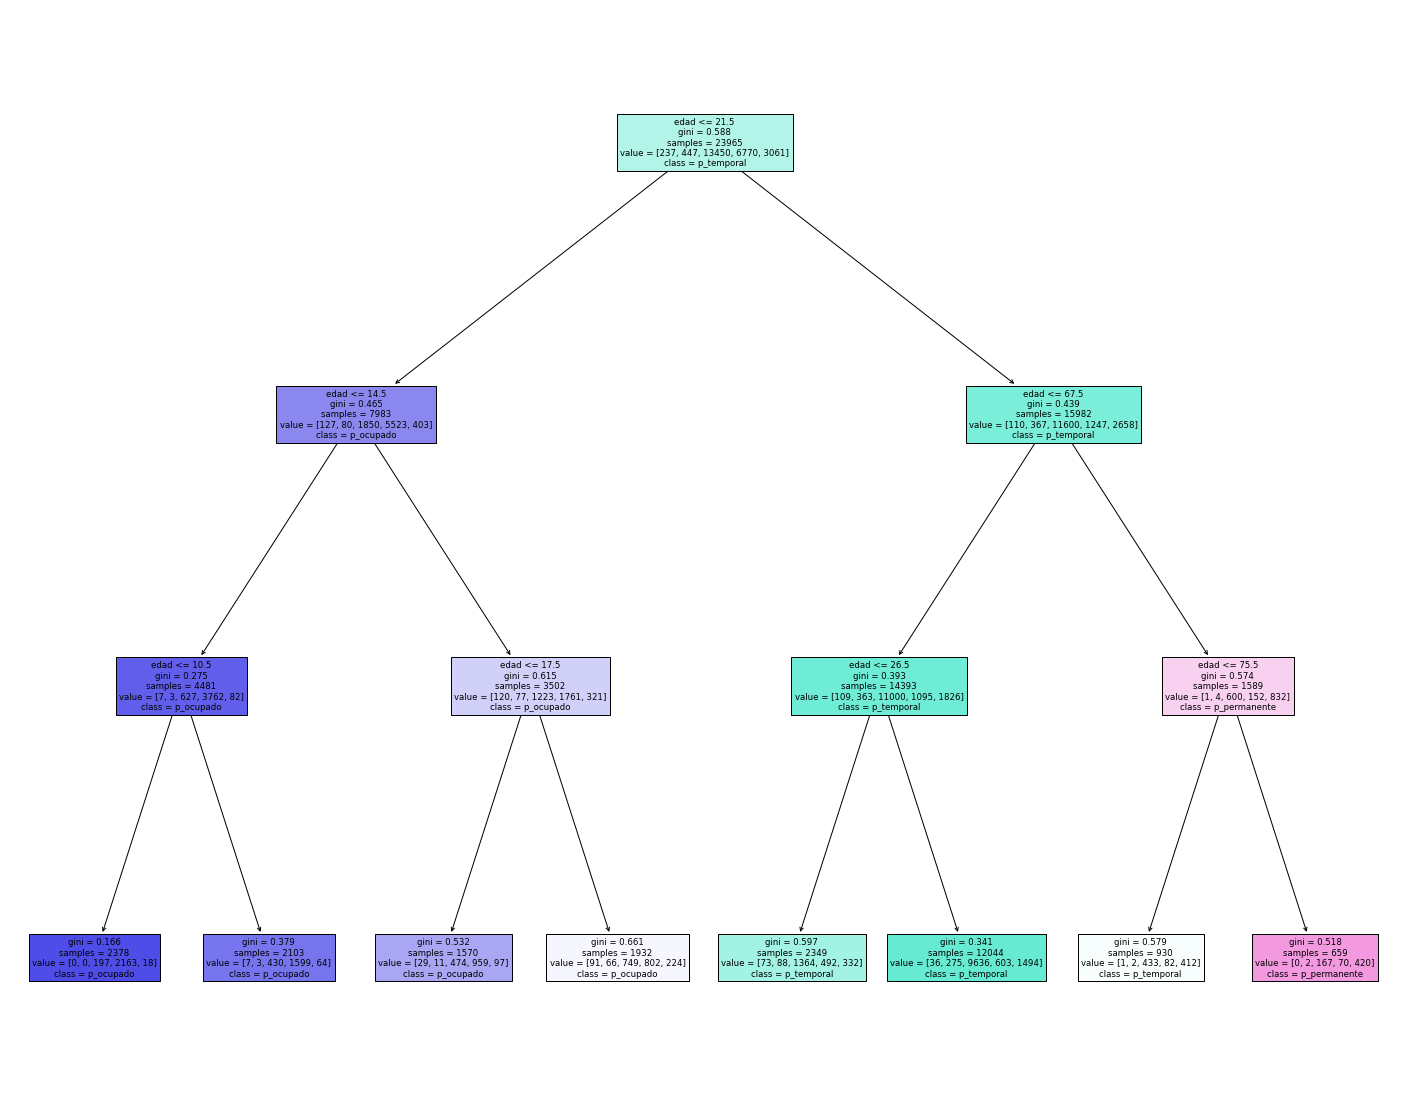

In [195]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr_2, 
                   feature_names=nomcol,  
                   class_names=df.target,
                   filled=True)

Segun el grafico, la clasificacion de una persona cualquiera a una de las 6 categorias de condicion laboral,
segun el modelo de arbol de decision, prima mas la edad, el numero de hijos, y los anios de estudio
con 3 niveles de profundidad en cuanto al modelo.

El arbol de decision nos ayuda a clasificar la condicion laboral de las personas en funcion a los predictores,
mediante metodos euristicos, segun la informacion obtenida sin utilizar metodos estadisticos.